## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df  = application_df.drop(columns= ['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
unique_value_counts = application_df.nunique()
unique_value_counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# For  columns w/ more than 10 unique values, 
# determine the number of data points for each unique value.
keys = unique_value_counts.keys()
counter = 0

for i in unique_value_counts:
    if i > 10:
        current_col = keys[counter]
        print('_____________________________')
        print(current_col)
        print(application_df[current_col].value_counts())
    counter +=1

_____________________________
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
_____________________________
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C1283        1
C1732        1
C1580        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64
_____________________________
ASK_AMT
5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64


In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts_df = pd.DataFrame(app_type_counts)
app_type_counts_df.reset_index(inplace=True)
app_type_counts_df.columns = ['app_type', 'count']
app_type_counts_df


,app_type,count
0,T3,27037
1,T4,1542
2,T6,1216
3,T5,1173
4,T19,1065
5,T8,737
6,T7,725
7,T10,528
8,T9,156
9,T13,66


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for i in range(len(app_type_counts_df)):
    if (app_type_counts_df.loc[i, 'count'] < 700):
        application_types_to_replace.append(app_type_counts_df.loc[i, 'app_type'])

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts_df = pd.DataFrame(classification_counts)
classification_counts_df.reset_index(inplace=True)
classification_counts_df.columns = ['classification', 'count']
classification_counts_df

,classification,count
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
...,...,...
66,C1370,1
67,C1283,1
68,C1732,1
69,C1580,1


In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_df[classification_counts_df['count']>1]


,classification,count
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
5,C7000,777
6,C1700,287
7,C4000,194
8,C5000,116
9,C1270,114


In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []

for i in range(len(classification_counts_df)):
    if (classification_counts_df.loc[i, 'count'] <= 700):
        classifications_to_replace.append(classification_counts_df.loc[i, 'classification'])

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df)
dummies_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = dummies_df['IS_SUCCESSFUL'].values
X = dummies_df.drop('IS_SUCCESSFUL', axis=1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78) 

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

##### Above, values were added to the 'other' bin for Classication and Application Type columns.
##### First Attempt: Number of neurons in each layer increased

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()
number_input_features = len(X_train[0])

# First hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features, activation="relu", input_dim=number_input_features)) 

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features/2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 43)                1892      
_________________________________________________________________
dense_1 (Dense)              (None, 21)                924       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 22        
Total params: 2,838
Trainable params: 2,838
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 3s 134us/sample - loss: 0.5754 - accuracy: 0.7191 - loss: 0.5759 - accuracy: 0.71
Epoch 2/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5557 - accuracy: 0.7291
Epoch 3/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5534 - accuracy: 0.7303
Epoch 4/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5510 - accuracy: 0.7310
Epoch 5/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5502 - accuracy: 0.7318
Epoch 6/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5485 - accuracy: 0.7321
Epoch 7/100
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5473 - accuracy: 0.7329s - loss: 0.5482 - accuracy: 0.
Epoch 8/100
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5470 - accuracy: 0.7325
Epoch 9/100
25724/25724 [========================

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5563 - accuracy: 0.7238
Loss: 0.5565977676060735, Accuracy: 0.7238484025001526


##### Second Attempt: Another layer added, and more nuerons

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()
number_input_features = len(X_train[0])

# First hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features, activation="relu", input_dim=number_input_features)) 

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features/2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features/3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 43)                1892      
_________________________________________________________________
dense_4 (Dense)              (None, 21)                924       
_________________________________________________________________
dense_5 (Dense)              (None, 14)                308       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 15        
Total params: 3,139
Trainable params: 3,139
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) # Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 3s 127us/sample - loss: 0.5763 - accuracy: 0.7167
Epoch 2/100
25724/25724 [==============================] - 2s 82us/sample - loss: 0.5544 - accuracy: 0.7300
Epoch 3/100
25724/25724 [==============================] - 2s 82us/sample - loss: 0.5508 - accuracy: 0.7311
Epoch 4/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.5492 - accuracy: 0.7337
Epoch 5/100
25724/25724 [==============================] - 2s 88us/sample - loss: 0.5482 - accuracy: 0.7333
Epoch 6/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.5469 - accuracy: 0.7334
Epoch 7/100
25724/25724 [==============================] - 3s 123us/sample - loss: 0.5468 - accuracy: 0.7347
Epoch 8/100
25724/25724 [==============================] - 3s 98us/sample - loss: 0.5459 - accuracy: 0.7331
Epoch 9/100
25724/25724 [==============================] - 3s 99us/sample - loss: 0.5456 - accuracy: 0.7337
Ep

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5534 - accuracy: 0.7257
Loss: 0.5544330729687527, Accuracy: 0.7257142663002014


##### Third Attempt: Rows with outliers in Ask Ammount removed
##### The number of layers and neurons is the same as the last attempt.

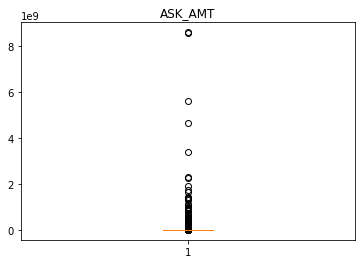

Lower Bound: 887.0
Upper Bound: 11855.0


(26093, 44)

In [21]:
# find outliers for ASK_AMT 
import matplotlib.pyplot as plt
import numpy as np

ask_ammounts = dummies_df['ASK_AMT']
fig1, ax1 = plt.subplots()
ax1.set_title('ASK_AMT')
ax1.boxplot(ask_ammounts)
plt.show()

quartiles = np.quantile(ask_ammounts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

dummies_df.drop(dummies_df[dummies_df['ASK_AMT'] < lower_bound ].index, inplace = True)
dummies_df.drop(dummies_df[dummies_df['ASK_AMT'] > upper_bound ].index, inplace = True)
dummies_df.shape

In [22]:
# Split our preprocessed data into our features and target arrays
y2 = dummies_df['IS_SUCCESSFUL'].values
X2 = dummies_df.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=78) 

In [23]:
# Create a StandardScaler instances
scaler2 = StandardScaler()

# Fit the StandardScaler
X_scaler2 = scaler2.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()
number_input_features = len(X_train2[0])

# First hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features, activation="relu", input_dim=number_input_features)) 

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features/2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features/3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 43)                1892      
_________________________________________________________________
dense_8 (Dense)              (None, 21)                924       
_________________________________________________________________
dense_9 (Dense)              (None, 14)                308       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 15        
Total params: 3,139
Trainable params: 3,139
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled2, y_train2, epochs=100) 

Train on 19569 samples
Epoch 1/100
19569/19569 [==============================] - 3s 152us/sample - loss: 0.5714 - accuracy: 0.7278
Epoch 2/100
19569/19569 [==============================] - 2s 91us/sample - loss: 0.5347 - accuracy: 0.7454
Epoch 3/100
19569/19569 [==============================] - 2s 91us/sample - loss: 0.5316 - accuracy: 0.7478
Epoch 4/100
19569/19569 [==============================] - 2s 91us/sample - loss: 0.5300 - accuracy: 0.7482
Epoch 5/100
19569/19569 [==============================] - 2s 95us/sample - loss: 0.5292 - accuracy: 0.7490
Epoch 6/100
19569/19569 [==============================] - 2s 91us/sample - loss: 0.5283 - accuracy: 0.7480s - l
Epoch 7/100
19569/19569 [==============================] - 2s 91us/sample - loss: 0.5273 - accuracy: 0.7495
Epoch 8/100
19569/19569 [==============================] - 2s 91us/sample - loss: 0.5267 - accuracy: 0.7498
Epoch 9/100
19569/19569 [==============================] - 2s 86us/sample - loss: 0.5264 - accuracy: 0.7502

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6524/1 - 0s - loss: 0.5446 - accuracy: 0.7498
Loss: 0.5405569815109436, Accuracy: 0.7498466968536377


##### Fourth Attempt: Removing the SPECIAL_CONSIDERATIONS column

In [28]:
# Drop the special considerations column.
dummies_df  = dummies_df.drop(columns= ['SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'])
dummies_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,1,5000,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,1,5000,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,5000,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34294,1,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
# Split our preprocessed data into our features and target arrays
y2 = dummies_df['IS_SUCCESSFUL'].values
X2 = dummies_df.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=78) 

In [30]:
# Create a StandardScaler instances
scaler2 = StandardScaler()

# Fit the StandardScaler
X_scaler2 = scaler2.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()
number_input_features = len(X_train2[0])

# First hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features, activation="relu", input_dim=number_input_features)) 

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features/2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=number_input_features/3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                840       
_________________________________________________________________
dense_13 (Dense)             (None, 13)                273       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 14        
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [33]:
# Create a callback that saves the model's weights every 5 epochs.
checkpoint_filepath = 'saved_weights_5_epochs/optimization/weights_{epoch}_{accuracy:.2f}.hdf5'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, 
    monitor='accuracy', 
    save_weights_only=True, 
    mode='auto', 
    period=5,
)

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled2, y_train2, epochs=100, callbacks=[model_checkpoint_callback]) 

Train on 19569 samples
Epoch 1/100
19569/19569 [==============================] - 3s 158us/sample - loss: 0.5646 - accuracy: 0.7306
Epoch 2/100
19569/19569 [==============================] - 2s 103us/sample - loss: 0.5364 - accuracy: 0.7430
Epoch 3/100
19569/19569 [==============================] - 3s 141us/sample - loss: 0.5323 - accuracy: 0.7467
Epoch 4/100
19569/19569 [==============================] - 3s 140us/sample - loss: 0.5295 - accuracy: 0.7479
Epoch 5/100
19569/19569 [==============================] - 3s 170us/sample - loss: 0.5292 - accuracy: 0.7472
Epoch 6/100
19569/19569 [==============================] - 2s 121us/sample - loss: 0.5285 - accuracy: 0.7500
Epoch 7/100
19569/19569 [==============================] - 2s 84us/sample - loss: 0.5280 - accuracy: 0.7470
Epoch 8/100
19569/19569 [==============================] - 2s 85us/sample - loss: 0.5270 - accuracy: 0.7498
Epoch 9/100
19569/19569 [==============================] - 2s 89us/sample - loss: 0.5261 - accuracy: 0.7510

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6524/1 - 1s - loss: 0.5515 - accuracy: 0.7503
Loss: 0.5393643098912453, Accuracy: 0.7503065466880798


In [36]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

# Overview:
In this project, a binary classifier neural network is developed. The neural network that is intended to predict whether or not organizations that apply for funding from Alphabet Soup will be successful. 

The Neural network is trained on a CSV containing over 34,000 organizations funded byAlphabet Soup over the years.

5 different neural network were compiled and trained. throughput the project, steps taken to optimize the neural network's performance and attempt at imporving the accuracy score, in both the data processing and training stages. 


# Results:

#### Data Preprocessing

* Target variable: 
    * IS_SUCCESSFUL — Was the money used effectively  
    
* Features:
    * In the first 4 attempts:
        * **APPLICATION_TYPE**—Alphabet Soup application type
        * **AFFILIATION**—Affiliated sector of industry
        * **CLASSIFICATION**—Government organization classification
        * **USE_CASE**—Use case for funding
        * **ORGANIZATION**—Organization type
        * **STATUS**—Active status
        * **INCOME_AMT**—Income classification
        * **SPECIAL_CONSIDERATIONS**—Special consideration for application
        * **ASK_AMT**—Funding amount requested

    * In the 5th attempt, SPECIAL_CONSIDERATIONS (Special consideration for application) was removed.

* Variables removed from the input data
    * **EIN** and **NAME**—Identification columns

        
Compiling, Training, and Evaluating the Model
How many neurons, layers, and activation functions did you select for your neural network model, and why?
Were you able to achieve the target model performance?
What steps did you take to try and increase model performance?
Summary: Summarize the overall results of the deep learning model. Include a recommendation for how a different model could solve this classification problem, and explain your recommendation.